In [45]:
%pip install pandas 


Note: you may need to restart the kernel to use updated packages.


In [46]:
%pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd 


In [4]:
import numpy as np 

In [3]:
%pip install seaborn 

Note: you may need to restart the kernel to use updated packages.


In [48]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt

In [6]:
import sklearn as sk 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
df = pd.read_csv("./Housing-2-1.csv")

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [14]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

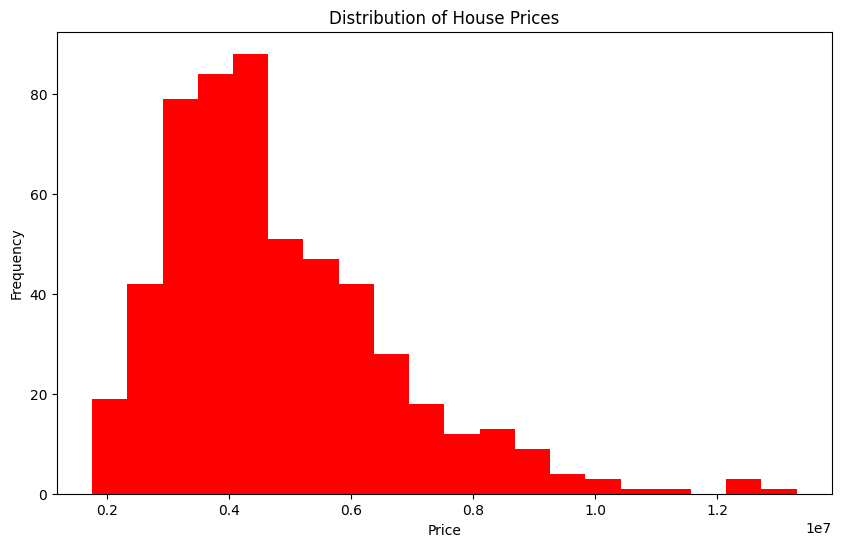

In [15]:
plt.figure(figsize=(10,6))
plt.hist(df['price'],bins=20,color='red')
plt.title("Distribution of House Prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

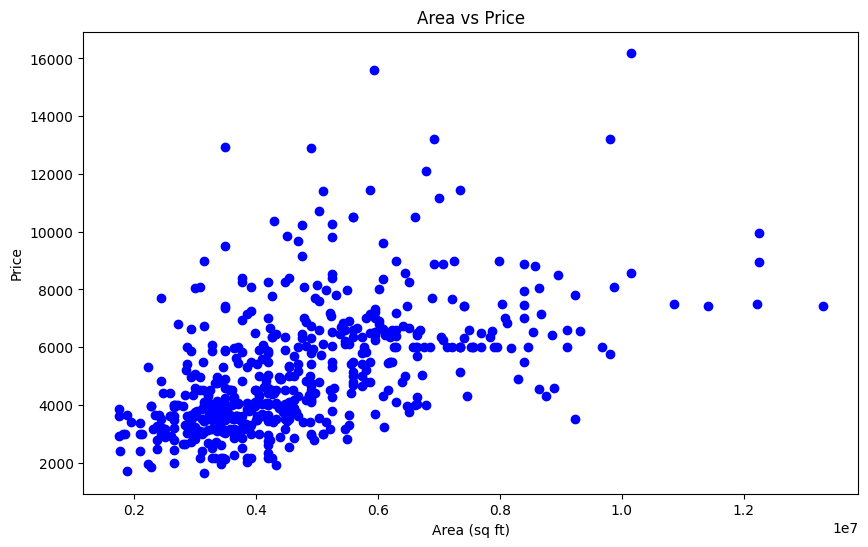

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['area'], color='blue')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show


In [17]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [18]:
df['mainroad_yes']=df['mainroad'].map({'yes':1, 'no':0})
df['mainroad_no']=df['mainroad'].map({'no':1, 'yes':0})

In [19]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_yes,mainroad_no
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,0


In [20]:
categorical_cols=['mainroad','guestroom','basement','hotwaterhearting','airconditing','prefarea','furnishingstatus']
df_encoded = pd.get_dummies(df,categorical_cols,drop_first=True )

Taregt and Independent

In [21]:
X = df_encoded.drop('price', axis =1)
y = df_encoded['price']

In [22]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [23]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(X_test)

In [25]:
comparison=pd.DataFrame({
    'area': X_test['area'].values[:5],
    'price': y_test.values[:5],
    'predicted_price': y_pred[:5],
    'Difference': y_test.values[:5] - y_pred[:5]
})
print(comparison.round(2))

   area    price  predicted_price  Difference
0  5900  4060000       5164653.90 -1104653.90
1  6500  6650000       7224722.30  -574722.30
2  4040  3710000       3109863.24   600136.76
3  5000  6440000       4612075.33  1827924.67
4  3960  2800000       3294646.26  -494646.26


In [26]:
r2 = r2_score(y_test,y_pred)

In [27]:
r2

0.6529242642153184

In [28]:
mse = mean_squared_error(y_test,y_pred)
mse

1754318687330.6638

In [29]:
rmse = np.sqrt(mse)
rmse

np.float64(1324506.9600914386)

In [30]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

970043.4039201637

In [31]:
avg_price = y_test.mean()
rmse_percentage = (rmse / avg_price) * 100
mae_percentage = (mae / avg_price) * 100 

print(f"RMSE: {rmse} ({rmse_percentage: 2f}%)")
print(f"MSE: {mse} ({mae_percentage: 2f}%)")

RMSE: 1324506.9600914386 ( 26.450270%)
MSE: 1754318687330.6638 ( 19.371668%)


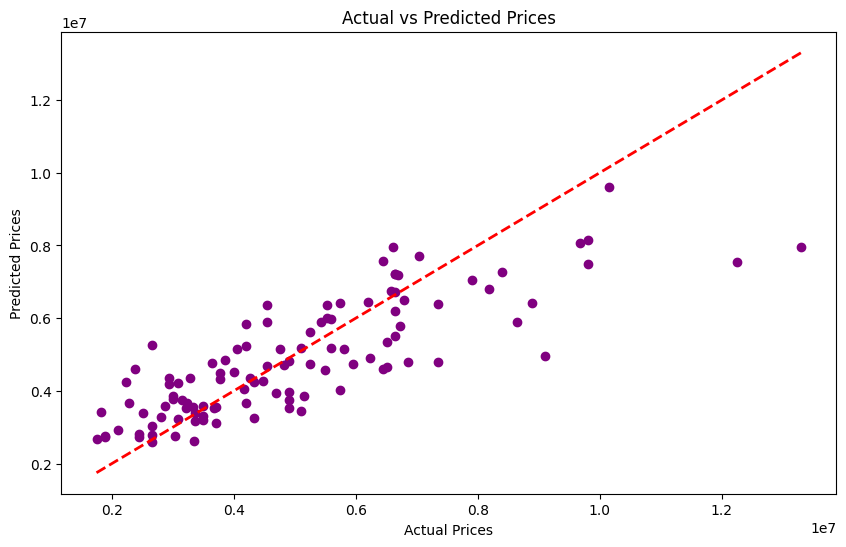

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred,color='purple')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()],'r--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [33]:
model.coef_

array([ 2.35968805e+02,  7.67787016e+04,  1.09444479e+06,  4.07476595e+05,
        2.24841913e+05,  1.22639983e+05, -1.22639983e+05,  1.22639983e+05,
        2.31610037e+05,  3.90251176e+05,  6.84649885e+05,  7.91426736e+05,
        6.29890565e+05, -1.26881818e+05, -4.13645062e+05])

In [34]:
model.intercept_

np.float64(382672.34016726725)

In [35]:
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance

area                               2.359688e+02
bedrooms                           7.677870e+04
bathrooms                          1.094445e+06
stories                            4.074766e+05
parking                            2.248419e+05
mainroad_yes                       1.226400e+05
mainroad_no                       -1.226400e+05
mainroad_yes                       1.226400e+05
guestroom_yes                      2.316100e+05
basement_yes                       3.902512e+05
hotwaterhearting_yes               6.846499e+05
airconditing_yes                   7.914267e+05
prefarea_yes                       6.298906e+05
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64

In [51]:

for i in feature_importance.sort_values(ascending=False).index:
    print(f"{i}: {feature_importance[i]:.4f}")

bathrooms: 1094444.7861
airconditing_yes: 791426.7358
hotwaterhearting_yes: 684649.8853
prefarea_yes: 629890.5653
stories: 407476.5950
basement_yes: 390251.1762
guestroom_yes: 231610.0372
parking: 224841.9133


TypeError: unsupported format string passed to Series.__format__

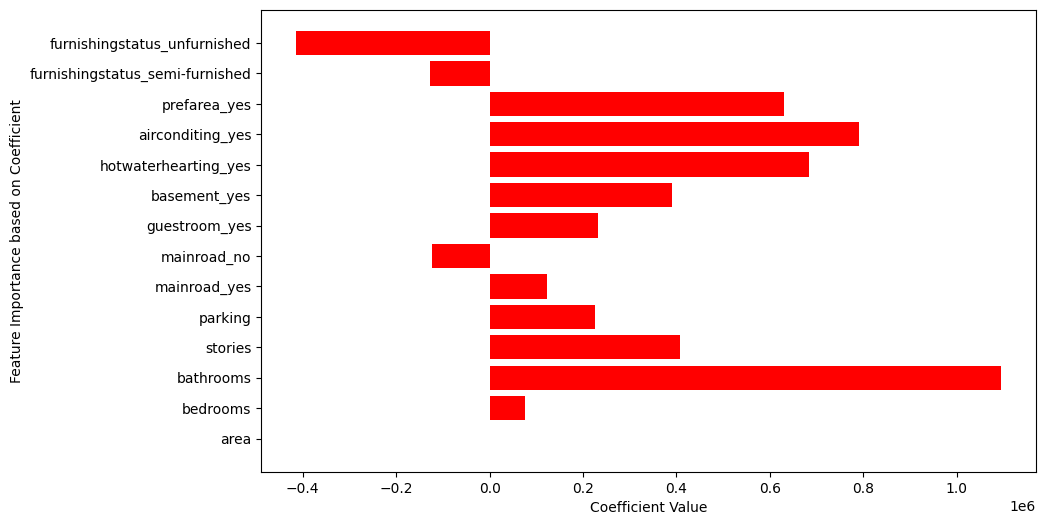

In [52]:
plt.figure(figsize=(10,6))
plt.barh(feature_importance.index, feature_importance, color='red')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Importance based on Coefficient")
plt.show()

In [54]:
sample_results = pd.DataFrame({
    'Actual_Price' : y_test.values[:5],
    'Predicted_Price' : y_pred[:5],
    'Difference': y_test.values[:5] - y_pred[:5]
})
sample_results

,Actual_Price,Predicted_Price,Difference
0,4060000,5.164654e+06,-1.104654e+06
1,6650000,7.224722e+06,-5.747223e+05
2,3710000,3.109863e+06,6.001368e+05
3,6440000,4.612075e+06,1.827925e+06
4,2800000,3.294646e+06,-4.946463e+05


In [59]:
for i, row in sample_results.iterrows():
    print(f"Sample {i+1} - Actual Price: {row['Actual_Price']}, Predicted Price: {row['Predicted_Price']}, Difference: {row['Difference']}")
    accuracy = (1-(abs(row['Difference'] / row['Actual_Price'])))*100
    print(f"Accurancy: {accuracy:.2f}%\n")

Sample 1 - Actual Price: 4060000.0, Predicted Price: 5164653.900339675, Difference: -1104653.9003396751
Accurancy: 72.79%

Sample 2 - Actual Price: 6650000.0, Predicted Price: 7224722.298021667, Difference: -574722.2980216667
Accurancy: 91.36%

Sample 3 - Actual Price: 3710000.0, Predicted Price: 3109863.2424033773, Difference: 600136.7575966227
Accurancy: 83.82%

Sample 4 - Actual Price: 6440000.0, Predicted Price: 4612075.327225595, Difference: 1827924.6727744052
Accurancy: 71.62%

Sample 5 - Actual Price: 2800000.0, Predicted Price: 3294646.2572595524, Difference: -494646.25725955237
Accurancy: 82.33%

